In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file, exact_m
from blume.run import new_folder, save, sweep_T
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

# Phase diagram of finite system

In [10]:
dir = new_folder()
T_c = 2 / np.log(1 + np.sqrt(2))

for size in [10, 100, 1000, 5000, 10000]:
    data = sweep_T(
        chi=16,
        T_range=(2.25, 2.3),
        step=0.0001,
        tol=1e-9,
        max_steps=size,
        b_c=True,
        fixed=True,
        which="max_steps"
    )
    save(data, dir)

L = 14: 100%|██████████| 97/97 [00:01<00:00, 92.21it/s]


Saving data in folder: '25-04 21:56'
Done 



L = 104: 100%|██████████| 97/97 [00:11<00:00,  8.15it/s]


Saving data in folder: '25-04 21:56'
Done 



L = 1004: 100%|██████████| 97/97 [01:41<00:00,  1.05s/it]


Saving data in folder: '25-04 21:56'
Done 



L = 5004: 100%|██████████| 97/97 [05:25<00:00,  3.36s/it]


Saving data in folder: '25-04 21:56'
Done 



L = 10004: 100%|██████████| 97/97 [06:39<00:00,  4.12s/it]

Saving data in folder: '25-04 21:56'
Done 



In [11]:
# Make dir for saving the plots
dir = "25-04 21:56"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

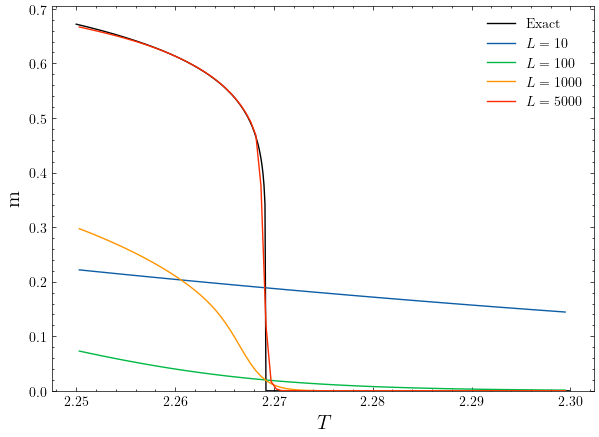

In [17]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.3)
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="Exact")

for size in [10, 100, 1000, 5000]:
    plot_file(size, range=T_range, prop=Prop.m, folder=dir)
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

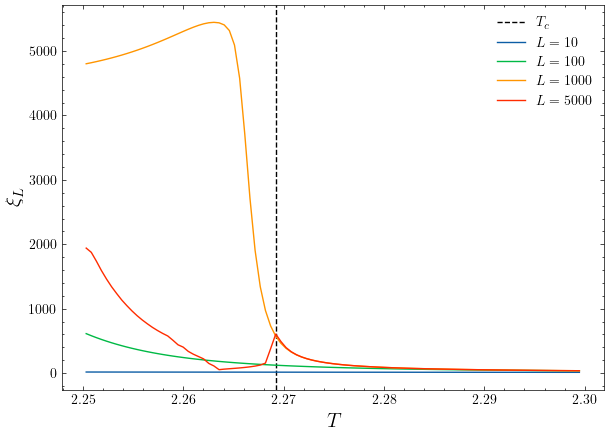

In [15]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for size in [10, 100, 1000, 5000]:
    plot_file(size, range=T_range, prop=Prop.xi, folder=dir)
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")

In [3]:
dir = new_folder()
T_c = 2 / np.log(1 + np.sqrt(2))

for size in range(1000, 30000, 1000):
    data = sweep_T(
        chi=32,
        T_range=[T_c],
        tol=1e-9,
        max_steps=size,
        b_c=True,
        fixed=True,
        which="max_steps"
    )
    save(data, dir)

TypeError: 'int' object is not subscriptable

In [4]:
mags, xis = [], []
dir = "25-04 19:03"
for size in range(1000, 30000, 1000):
    data = read(folder=dir, val=size)
    mags.extend(compute(Prop.m, data))
    xis.extend(compute(Prop.xi, data))

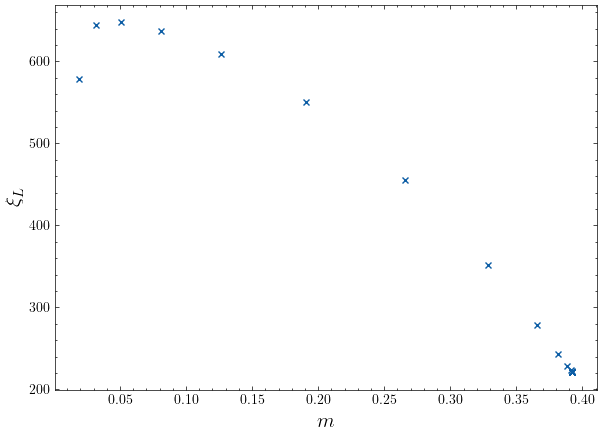

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(mags,xis, "x", markersize=5)
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.xlabel("$m$", fontsize=15)
plt.savefig(f"data/{dir}/critical")

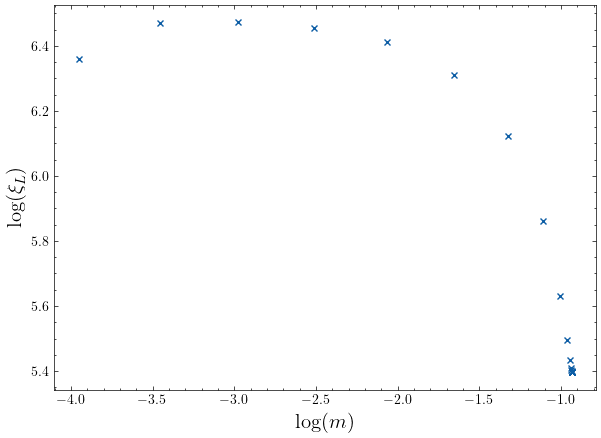

In [6]:
log_mags = [np.log(mag) for mag in mags]
log_xis = [np.log(xi) for xi in xis]
plt.figure(figsize=(7, 5))
plt.plot(log_mags,log_xis, "x", markersize=5)
plt.ylabel(r"$\log(\xi_{L})$", fontsize=15)
plt.xlabel("$\log(m)$", fontsize=15)
plt.savefig(f"data/{dir}/critical")